In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Rajiv Ghoshal',
 'Chandra Thapamagar',
 'Bishal Magranti',
 'Binod Chettri',
 'Ayush Dhewajoo',
 'Chandra Panthee',
 'Ayus Udash',
 'Udgam Bijukachhe',
 'Chandra Powdel',
 'Saroj vatsa Tamot']

In [7]:
total_customer = 300000
male_percent = 58

male = {'name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'gender'
] = 'Prefer not to say'

In [11]:
df.gender.value_counts()

Male                 156664
Female               111522
Other                 20891
Prefer not to say     10923
Name: gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['email'] = df.name.apply(email_gen)

In [14]:
df

,name,gender,email
0,Jenis Kone,Male,jenis.kone@fakeemail.com
1,Czan duwal Poudal,Male,czan.duwal@fakeemail.com
2,Bikash Manandahr,Male,bikash.manandahr@fakeemail.com
3,Kush Pratik,Male,kush.pratik@fakeemail.com
4,Jenis Pratik,Male,jenis.pratik@fakeemail.com
...,...,...,...
125995,Alina Baraily,Female,alina.baraily@fakeemail.com
125996,Amita Quureshi,Female,amita.quureshi@fakeemail.com
125997,Sneha Rapacha,Female,sneha.rapacha@fakeemail.com
125998,Reeya Dallakoti,Female,reeya.dallakoti@fakeemail.com


In [15]:
df['phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,name,gender,email,phone
0,Jenis Kone,Male,jenis.kone@fakeemail.com,9841921881
1,Czan duwal Poudal,Male,czan.duwal@fakeemail.com,9841674881
2,Bikash Manandahr,Male,bikash.manandahr@fakeemail.com,9841687652
3,Kush Pratik,Male,kush.pratik@fakeemail.com,9841571898
4,Jenis Pratik,Male,jenis.pratik@fakeemail.com,9841908691
...,...,...,...,...
125995,Alina Baraily,Female,alina.baraily@fakeemail.com,9841663946
125996,Amita Quureshi,Female,amita.quureshi@fakeemail.com,9841386157
125997,Sneha Rapacha,Female,sneha.rapacha@fakeemail.com,9841545807
125998,Reeya Dallakoti,Female,reeya.dallakoti@fakeemail.com,9841483128


In [17]:
df['channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'channel'
] = 'Other'

In [19]:
df

,name,gender,email,phone,channel
0,Jenis Kone,Male,jenis.kone@fakeemail.com,9841921881,Word of Mouth
1,Czan duwal Poudal,Male,czan.duwal@fakeemail.com,9841674881,Facebook/Ads
2,Bikash Manandahr,Male,bikash.manandahr@fakeemail.com,9841687652,Google Search
3,Kush Pratik,Male,kush.pratik@fakeemail.com,9841571898,Facebook/Ads
4,Jenis Pratik,Male,jenis.pratik@fakeemail.com,9841908691,Google Search
...,...,...,...,...,...
125995,Alina Baraily,Female,alina.baraily@fakeemail.com,9841663946,Facebook/Ads
125996,Amita Quureshi,Female,amita.quureshi@fakeemail.com,9841386157,Word of Mouth
125997,Sneha Rapacha,Female,sneha.rapacha@fakeemail.com,9841545807,Other
125998,Reeya Dallakoti,Female,reeya.dallakoti@fakeemail.com,9841483128,Other


In [20]:
df.channel.value_counts()

Facebook/Ads     115038
Google Search     82333
Other             52701
Word of Mouth     49928
Name: channel, dtype: int64

In [21]:
df['first_contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'first_contact'
] = 'browser'

In [23]:
df

,name,gender,email,phone,channel,first_contact
0,Jenis Kone,Male,jenis.kone@fakeemail.com,9841921881,Word of Mouth,browser
1,Czan duwal Poudal,Male,czan.duwal@fakeemail.com,9841674881,Facebook/Ads,app
2,Bikash Manandahr,Male,bikash.manandahr@fakeemail.com,9841687652,Google Search,browser
3,Kush Pratik,Male,kush.pratik@fakeemail.com,9841571898,Facebook/Ads,browser
4,Jenis Pratik,Male,jenis.pratik@fakeemail.com,9841908691,Google Search,browser
...,...,...,...,...,...,...
125995,Alina Baraily,Female,alina.baraily@fakeemail.com,9841663946,Facebook/Ads,browser
125996,Amita Quureshi,Female,amita.quureshi@fakeemail.com,9841386157,Word of Mouth,browser
125997,Sneha Rapacha,Female,sneha.rapacha@fakeemail.com,9841545807,Other,browser
125998,Reeya Dallakoti,Female,reeya.dallakoti@fakeemail.com,9841483128,Other,app


In [24]:
df['first_contact'].value_counts()

browser    258183
app         41817
Name: first_contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,name,gender,email,phone,channel,first_contact
58229,Sneha Paswaan,Female,sneha.paswaan@fakeemail.com,9841733564,Facebook/Ads,browser
70380,Asisnero Bijukchhetimala,Male,asisnero.bijukchhetimala@fakeemail.com,9841481624,Facebook/Ads,browser
33809,Czan duwal Hajam,Male,czan.duwal@fakeemail.com,9841129648,Other,browser
89578,Anish Gaha,Male,anish.gaha@fakeemail.com,9841972435,Google Search,browser
111655,Alina Prashad,Female,alina.prashad@fakeemail.com,9841955544,Facebook/Ads,browser
...,...,...,...,...,...,...
5742,Yashoda Nykhan,Female,yashoda.nykhan@fakeemail.com,9841267463,Google Search,browser
88879,Karuna Ahamad,Female,karuna.ahamad@fakeemail.com,9841115760,Facebook/Ads,browser
148840,Swaraj Sanjel,Male,swaraj.sanjel@fakeemail.com,9841105465,Word of Mouth,browser
20918,Srijan Dawar,Prefer not to say,srijan.dawar@fakeemail.com,9841270301,Google Search,browser


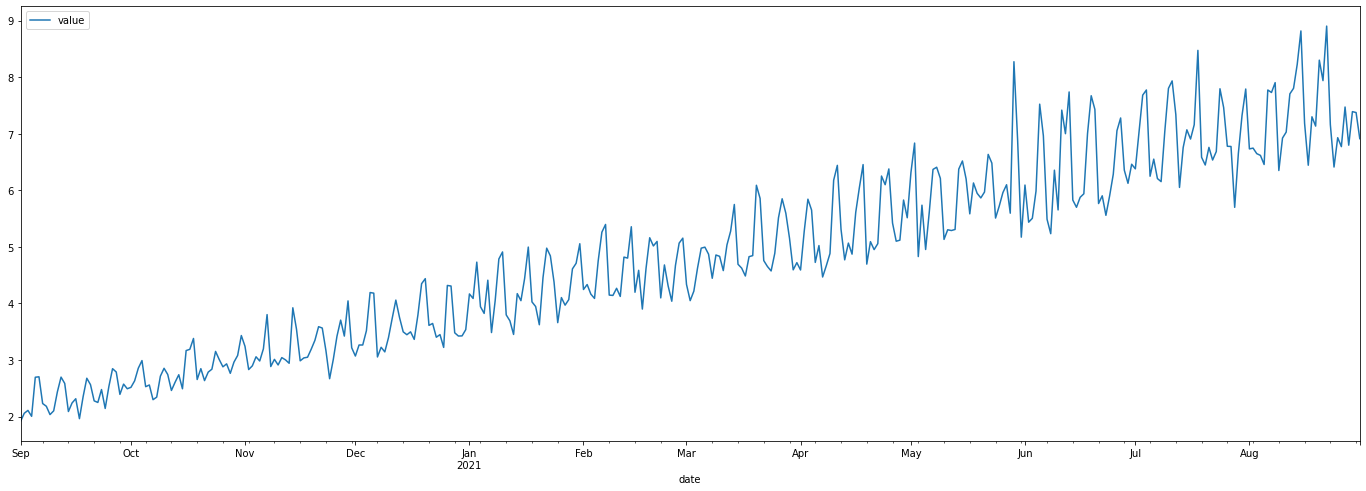

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (130*data.value).astype(int)

In [30]:
data.rows.sum()

227667

In [31]:
data

,date,base_amount,weekend_boost_factor,white_noise,my_linear_trend,total_factor,value,rows
0,2020-09-01,1.0,1.0,1.018021,2.000000,2.036042,2.036042,264
1,2020-09-02,1.0,1.0,1.007395,2.013699,2.028591,2.028591,263
2,2020-09-03,1.0,1.0,1.068349,2.027397,2.165968,2.165968,281
3,2020-09-04,1.0,1.1,1.027432,2.041096,2.306795,2.306795,299
4,2020-09-05,1.0,1.2,0.965594,2.054795,2.380917,2.380917,309
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,1.1,1.020515,6.931507,7.781077,7.781077,1011
361,2021-08-28,1.0,1.2,1.000280,6.945205,8.336578,8.336578,1083
362,2021-08-29,1.0,1.2,0.984517,6.958904,8.221393,8.221393,1068
363,2021-08-30,1.0,1.0,0.939997,6.972603,6.554222,6.554222,852


In [32]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = num + 800
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = num + 100
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = num + 50
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 2)
    return num

In [33]:
data['rows'] = data.apply(nepali_holiday, axis=1)

In [34]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [35]:
final_dates = (data.apply(create_list, axis=1).sum())

In [36]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [37]:
clients['created_at'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_72774/801896566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = final_dates


In [38]:
clients

,name,gender,email,phone,channel,first_contact,created_at
0,Sneha Paswaan,Female,sneha.paswaan@fakeemail.com,9841733564,Facebook/Ads,browser,2020-09-01 00:00:00
1,Asisnero Bijukchhetimala,Male,asisnero.bijukchhetimala@fakeemail.com,9841481624,Facebook/Ads,browser,2020-09-01 00:00:00
2,Czan duwal Hajam,Male,czan.duwal@fakeemail.com,9841129648,Other,browser,2020-09-01 00:00:00
3,Anish Gaha,Male,anish.gaha@fakeemail.com,9841972435,Google Search,browser,2020-09-01 00:00:00
4,Alina Prashad,Female,alina.prashad@fakeemail.com,9841955544,Facebook/Ads,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
289622,Nisu Bhusal,Female,nisu.bhusal@fakeemail.com,9841193643,Other,browser,2021-08-31 00:00:00
289623,Riyane Bagdiya,Prefer not to say,riyane.bagdiya@fakeemail.com,9841685776,Google Search,browser,2021-08-31 00:00:00
289624,Sam Kasti,Male,sam.kasti@fakeemail.com,9841594962,Google Search,app,2021-08-31 00:00:00
289625,Kusum Shresthacharya,Female,kusum.shresthacharya@fakeemail.com,9841249600,Google Search,app,2021-08-31 00:00:00


In [39]:
clients.gender.value_counts()

Male                 151276
Female               107633
Other                 20195
Prefer not to say     10523
Name: gender, dtype: int64

In [40]:
clients.channel.value_counts()

Facebook/Ads     111027
Google Search     79494
Other             50921
Word of Mouth     48185
Name: channel, dtype: int64

In [41]:
clients['first_contact'].value_counts()

browser    249296
app         40331
Name: first_contact, dtype: int64

In [42]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [43]:
clients['created_at'] = clients['created_at'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_72774/1294208807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = clients['created_at'].apply(random_times)


In [44]:
clients['client_id'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_72774/781864625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['client_id'] = clients.index + 100000000


In [45]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id
0,Sneha Paswaan,Female,sneha.paswaan@fakeemail.com,9841733564,Facebook/Ads,browser,2020-09-01 07:02:35.699489,100000000
1,Asisnero Bijukchhetimala,Male,asisnero.bijukchhetimala@fakeemail.com,9841481624,Facebook/Ads,browser,2020-09-01 12:26:15.923573,100000001
2,Czan duwal Hajam,Male,czan.duwal@fakeemail.com,9841129648,Other,browser,2020-09-01 03:34:09.346971,100000002
3,Anish Gaha,Male,anish.gaha@fakeemail.com,9841972435,Google Search,browser,2020-09-01 06:11:13.041308,100000003
4,Alina Prashad,Female,alina.prashad@fakeemail.com,9841955544,Facebook/Ads,browser,2020-09-01 10:35:03.629528,100000004
...,...,...,...,...,...,...,...,...
289622,Nisu Bhusal,Female,nisu.bhusal@fakeemail.com,9841193643,Other,browser,2021-08-31 02:31:44.495466,100289622
289623,Riyane Bagdiya,Prefer not to say,riyane.bagdiya@fakeemail.com,9841685776,Google Search,browser,2021-08-31 00:38:45.882240,100289623
289624,Sam Kasti,Male,sam.kasti@fakeemail.com,9841594962,Google Search,app,2021-08-31 21:22:54.489598,100289624
289625,Kusum Shresthacharya,Female,kusum.shresthacharya@fakeemail.com,9841249600,Google Search,app,2021-08-31 04:12:50.848789,100289625


In [46]:
def date_gen(start, end):
    start_date = datetime.date(start, 1, 1)
    end_date = datetime.date(end, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return str(random_date)

In [47]:
dob = [date_gen(1975, 1990) for x in range(clients.shape[0]//5)] + \
[date_gen(1991, 1995) for x in range(clients.shape[0]//5)] + \
[date_gen(1996, 2000) for x in range(clients.shape[0]//2)] + \
[date_gen(2001, 2005) for x in range(clients.shape[0]//2)] + \
[date_gen(2006, 2008) for x in range(clients.shape[0]//5)]

In [48]:
random.shuffle(dob)

In [49]:
clients['dob'] = dob[:clients.shape[0]]

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_72774/1825158366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['dob'] = dob[:clients.shape[0]]


In [50]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Sneha Paswaan,Female,sneha.paswaan@fakeemail.com,9841733564,Facebook/Ads,browser,2020-09-01 07:02:35.699489,100000000,2004-10-31
1,Asisnero Bijukchhetimala,Male,asisnero.bijukchhetimala@fakeemail.com,9841481624,Facebook/Ads,browser,2020-09-01 12:26:15.923573,100000001,2002-12-22
2,Czan duwal Hajam,Male,czan.duwal@fakeemail.com,9841129648,Other,browser,2020-09-01 03:34:09.346971,100000002,2003-10-27
3,Anish Gaha,Male,anish.gaha@fakeemail.com,9841972435,Google Search,browser,2020-09-01 06:11:13.041308,100000003,1987-12-06
4,Alina Prashad,Female,alina.prashad@fakeemail.com,9841955544,Facebook/Ads,browser,2020-09-01 10:35:03.629528,100000004,1999-11-09
...,...,...,...,...,...,...,...,...,...
289622,Nisu Bhusal,Female,nisu.bhusal@fakeemail.com,9841193643,Other,browser,2021-08-31 02:31:44.495466,100289622,1998-09-29
289623,Riyane Bagdiya,Prefer not to say,riyane.bagdiya@fakeemail.com,9841685776,Google Search,browser,2021-08-31 00:38:45.882240,100289623,1996-07-21
289624,Sam Kasti,Male,sam.kasti@fakeemail.com,9841594962,Google Search,app,2021-08-31 21:22:54.489598,100289624,2001-01-06
289625,Kusum Shresthacharya,Female,kusum.shresthacharya@fakeemail.com,9841249600,Google Search,app,2021-08-31 04:12:50.848789,100289625,1993-05-17


In [51]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Sneha Paswaan,Female,sneha.paswaan@fakeemail.com,9841733564,Facebook/Ads,browser,2020-09-01 07:02:35.699489,100000000,2004-10-31
1,Asisnero Bijukchhetimala,Male,asisnero.bijukchhetimala@fakeemail.com,9841481624,Facebook/Ads,browser,2020-09-01 12:26:15.923573,100000001,2002-12-22
2,Czan duwal Hajam,Male,czan.duwal@fakeemail.com,9841129648,Other,browser,2020-09-01 03:34:09.346971,100000002,2003-10-27
3,Anish Gaha,Male,anish.gaha@fakeemail.com,9841972435,Google Search,browser,2020-09-01 06:11:13.041308,100000003,1987-12-06
4,Alina Prashad,Female,alina.prashad@fakeemail.com,9841955544,Facebook/Ads,browser,2020-09-01 10:35:03.629528,100000004,1999-11-09
...,...,...,...,...,...,...,...,...,...
289622,Nisu Bhusal,Female,nisu.bhusal@fakeemail.com,9841193643,Other,browser,2021-08-31 02:31:44.495466,100289622,1998-09-29
289623,Riyane Bagdiya,Prefer not to say,riyane.bagdiya@fakeemail.com,9841685776,Google Search,browser,2021-08-31 00:38:45.882240,100289623,1996-07-21
289624,Sam Kasti,Male,sam.kasti@fakeemail.com,9841594962,Google Search,app,2021-08-31 21:22:54.489598,100289624,2001-01-06
289625,Kusum Shresthacharya,Female,kusum.shresthacharya@fakeemail.com,9841249600,Google Search,app,2021-08-31 04:12:50.848789,100289625,1993-05-17


In [52]:
# location = pd.read_csv("../datasets/location.csv")

In [53]:
# location = location[['lat', 'lon', 'name']]

In [54]:
# location_list =  [location.sample().values.tolist() for x in range(clients.shape[0])]

In [55]:
# location_df = pd.DataFrame(location_list)

In [56]:
# location_df

In [57]:
# location_df[['lat','lon', 'location_name']] = pd.DataFrame(location_df[0].tolist(), index= location_df.index)

In [58]:
# location_df[['lat', 'lon', 'location_name']]

In [59]:
# clients

In [60]:
# clients = pd.concat([clients, location_df[['lat', 'lon', 'location_name']]], axis=1)

In [61]:
list(clients)

['name',
 'gender',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at',
 'client_id',
 'dob']

In [62]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at']
].to_csv('../datasets/clients.csv', index=False)